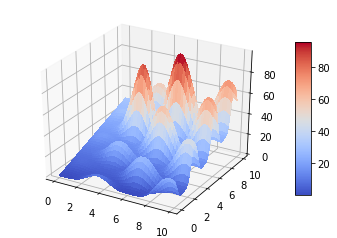

In [9]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(0, 10, 0.1)
Y = np.arange(0, 10, 0.1)
X, Y = np.meshgrid(X, Y)

F1 = lambda x,y:((6.452*(x+0.125*x)*(np.cos(x)-np.cos(2.*y))**2)/np.sqrt(0.8+(x-4.2)**2+2*(y-7)**2))+(3.226*y);

# Plot the surface.
surf = ax.plot_surface(X, Y, F1(X,Y), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.7, aspect=10)

plt.show()

# Algoritmo Genetico

In [10]:
population=10; #Tamaño de la poblacion

var=2;            #Numero de variables para la funcion
Pop = np.random.rand(population,var)*10 #Random numbers in [0,10]
Pop

array([[ 9.36096387,  8.12428138],
       [ 6.00207096,  3.77499984],
       [ 4.31572398,  9.05473245],
       [ 5.20255359,  7.27692392],
       [ 2.05705074,  0.81126896],
       [ 8.45732277,  3.6028568 ],
       [ 1.40826071,  2.15328991],
       [ 4.33959312,  3.57705303],
       [ 0.82508552,  3.2956548 ],
       [ 2.7532189 ,  0.05920466]])

In [11]:
Tm=0.4;           #Tasa de mutacion 
Tc=0.4;          #Tasa de cruce  Porcentaje de parejas van a ser seleccionadas para el cruce
population=20; #Tamaño de la poblacion
var=2;            #Numero de variables para la funcion
N=10;           #Numero de generaciones
alpha= 0.5        #For aritmetic recombination

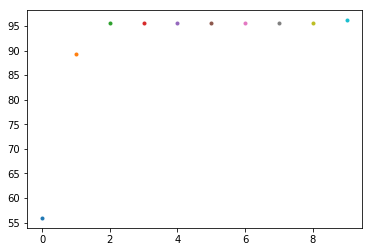

In [12]:
Pop = np.random.rand(population,var)*10 #Random numbers in [0,10]


for gen in range(N):
    # Fitness evaluation
    Fitness = F1(Pop[:,0],Pop[:,1])
    
    BestIndividuos = np.argsort(-Fitness)
    
    Pop = Pop[BestIndividuos]
    
    Wheel = np.cumsum(Fitness[BestIndividuos])/np.sum(Fitness[BestIndividuos])
    
    # Crossover - Wheel 
    
    for parent in range(int(Tc*population/2)):
        P = np.random.rand(1)
        ParentSelected_1 = np.where(Wheel >= P)[0][0]
        
        P = np.random.rand(1)
        ParentSelected_2 = np.where(Wheel >= P)[0][0]
        
        #Crossover Aritmetic recombination
        Child_1 = (1-alpha)*Pop[ParentSelected_1] + alpha*Pop[ParentSelected_2]
        Child_2 = alpha*Pop[ParentSelected_1]     + (1-alpha)*Pop[ParentSelected_2]
    
        #Add to population
        Pop = np.append(Pop,Child_1[None,:],axis=0)
        Pop = np.append(Pop,Child_2[None,:],axis=0)
    
    
    # Mutation - Wheel
    for parent in range(int(Tm*population)):
        P = np.random.rand(1)
        ParentSelected = np.where(Wheel >= P)[0][0]
        
        #Add to population
        Child_1 = Pop[ParentSelected] + np.random.rand(1)
        Pop = np.append(Pop,Child_1[None,:],axis=0)
        
    #Selection
    Fitness = F1(Pop[:,0],Pop[:,1])
    
    
    
    BestIndividuos = np.argsort(-Fitness)
    
    Pop = Pop[BestIndividuos[:population]]
    
    plt.plot(gen,F1(Pop[0,0],Pop[0,1]),'.')
plt.show()

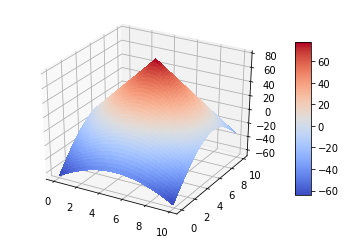

In [36]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(0, 10, 0.1)
Y = np.arange(0, 10, 0.1)
X, Y = np.meshgrid(X, Y)

FR = lambda x,y:(4 - np.sqrt(((x-5)/1.2)**2 + (y-6)**2))*20;

# Plot the surface.
surf = ax.plot_surface(X, Y, FR(X,Y), cmap=cm.coolwarm, linewidth=0, antialiased=False)


# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.7, aspect=10)

plt.show()